In [1]:
from utils import *

## Logistic Regression

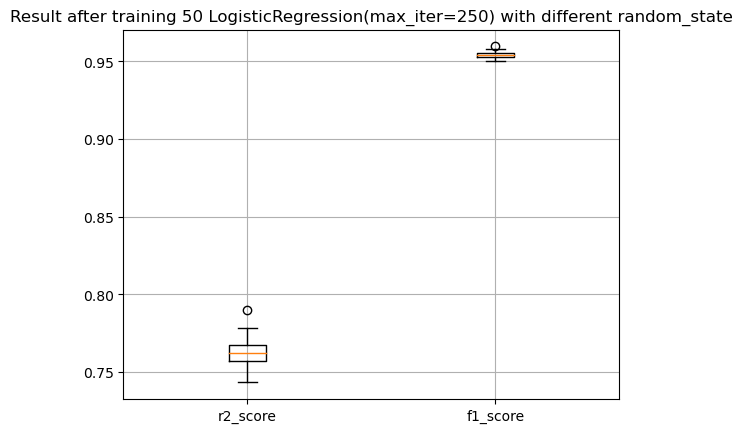

In [2]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
value = multi_test(logistic_model,X=X,Y=Y,n=50)

In [5]:
submit_logistic = submission(LogisticRegression(),name_file="Submissions/logistic_submission.csv")

Grid Search Progress: 100%|██████████| 72/72 [47:16<00:00, 39.40s/it]

LogisticRegression(C=10, max_iter=500, n_jobs=6, random_state=42, tol=1e-05)


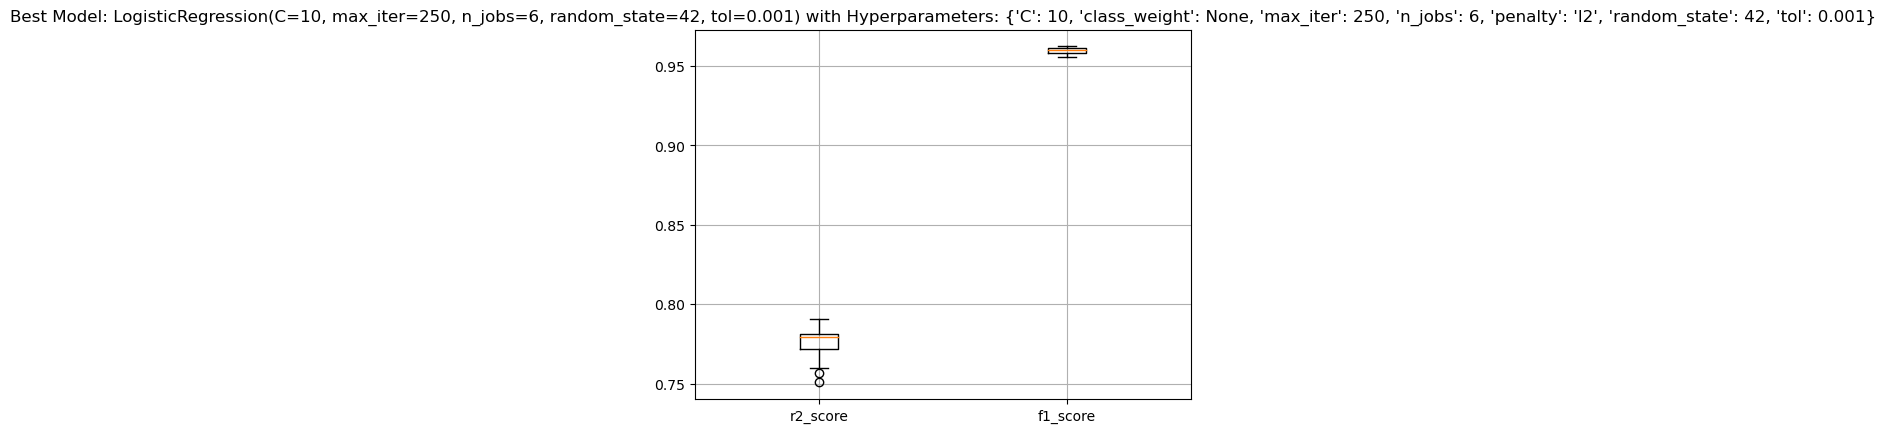

Best hyperparameters: {'C': 10, 'class_weight': None, 'max_iter': 250, 'n_jobs': 6, 'penalty': 'l2', 'random_state': 42, 'tol': 0.001}
Best score (f1_score): 0.9593557405552791


In [3]:

hyperparameters = {
    "penalty": [ "l2"],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100,250,500],
    'tol': [1e-3,1e-4, 1e-5],
    "n_jobs":[6],
    "random_state":[random_seed],
}

logistic_model = LogisticRegression()

best_model_logistic, best_params_logistic, best_score_logistic, all_results_logistic = grid_search(
    logistic_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Logistic_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [4]:
submit_best_logistic = submission(best_model_logistic,name_file="Submissions/best_logistic_submission.csv")

### K_Neighbors Classifier

Grid Search Progress: 100%|██████████| 96/96 [01:19<00:00,  1.21it/s]


KNeighborsClassifier(leaf_size=40, n_jobs=8, n_neighbors=60, p=3,
                     weights='distance')


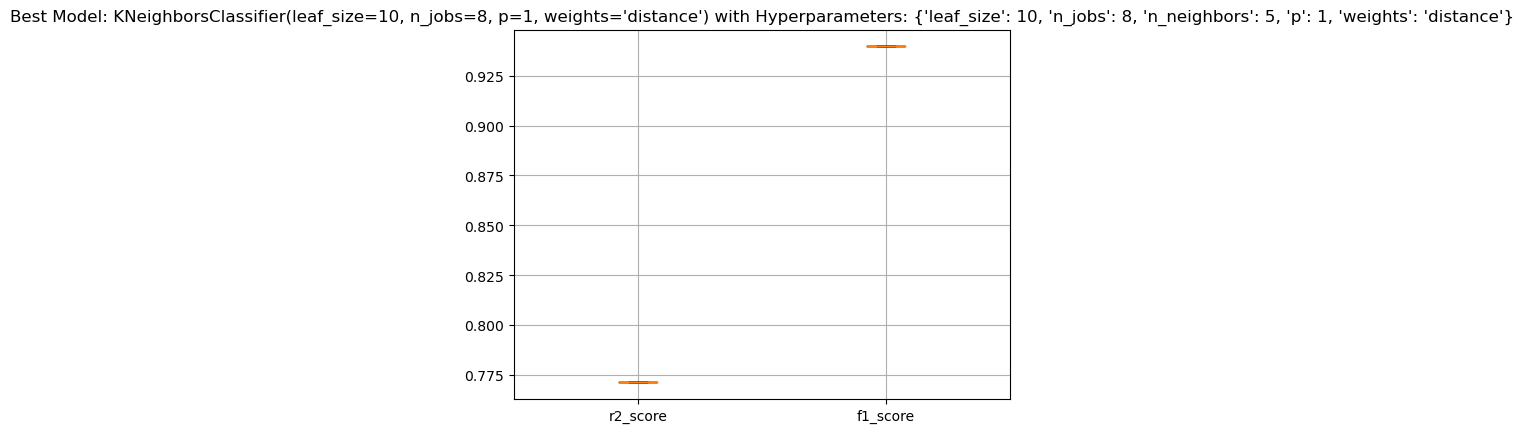

Best hyperparameters: {'leaf_size': 10, 'n_jobs': 8, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score (f1_score): 0.9396735378027641


In [3]:
hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,15,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu//2]
}

neighbor_model = KNeighborsClassifier()

best_model_neighbor, best_params_neighbor, best_score_neighbor, all_results_neighbor = grid_search(
    neighbor_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Classifier/grid_best_model.joblib" ,display_boxplot=True)

In [4]:
submission(best_model_neighbor,name_file="Submissions/best_neighbor_submission.csv")

,obj_ID,label
0,52295,1
1,52296,0
2,52297,1
3,52298,0
4,52299,0
...,...,...
25753,78048,1
25754,78049,0
25755,78050,0
25756,78051,0


### Random Forest Classifier

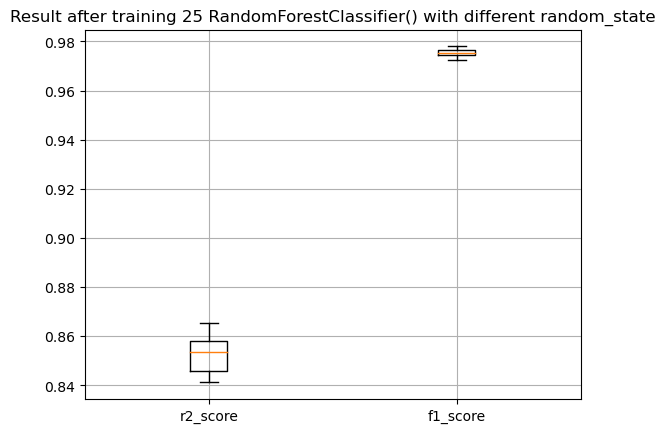

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
value = multi_test(forest_model,n=25,random_start=420,test_size=0.25)

In [4]:
forest_model = RandomForestClassifier()
submit_forest = submission(forest_model,name_file="Submissions/forest_classifier_submission.csv")

In [5]:
hyperparameters = {
    "criterion": [ "gini",'entropy','log_loss'],
    'n_estimators': [50, 100,200,400,800],
    #'max_depth': [20,50,100,200,400],
    "n_jobs":[nb_cpu],
    "random_state":[random_seed],
}

forest_model = RandomForestClassifier()

best_model_forest, best_params_forest, best_score_forest, all_results_forest = grid_search(
    forest_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Random_Forest/grid_best_model.joblib" ,display_boxplot=True)

Grid Search Progress:  53%|█████▎    | 8/15 [31:30<27:34, 236.29s/it]  


KeyboardInterrupt: 

In [ ]:
submit_best_forest = submission(best_model_forest,name_file="Submissions/best_forest_classifier_submission.csv")

### Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

random_seed = 42
param_grid = {
    "loss": [ 'log_loss',"deviance"],
    'learning_rate': [ 0.1],#, 0.2],
    'n_estimators': [250],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    "n_iter_no_change" : [15],
    "random_state":[random_seed],
}

boosting_classif_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=boosting_classif_model, param_grid=param_grid, scoring='r2',verbose=1,n_jobs=nb_cpu//2)

grid_search.fit(X, Y)
best_params_boost = grid_search.best_params_
best_model_boost = grid_search.best_estimator_

save_model(best_model_boost,path_to_save="Archives_Model/Boosting_Classificator/scikit_GDCV_best_model")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
submit_best_scikit_GDCV_boosting = submission(best_model_boost,name_file="Submissions/best_scikit_GDCV_boosting_submission.csv")

GradientBoostingClassifier(loss='deviance', max_depth=200, n_estimators=250,
                           n_iter_no_change=15)

Grid Search Progress: 100%|██████████| 48/48 [1:21:11<00:00, 101.50s/it]


GradientBoostingClassifier(criterion='squared_error', loss='deviance',
                           max_depth=400, n_estimators=500,
                           n_iter_no_change=15)


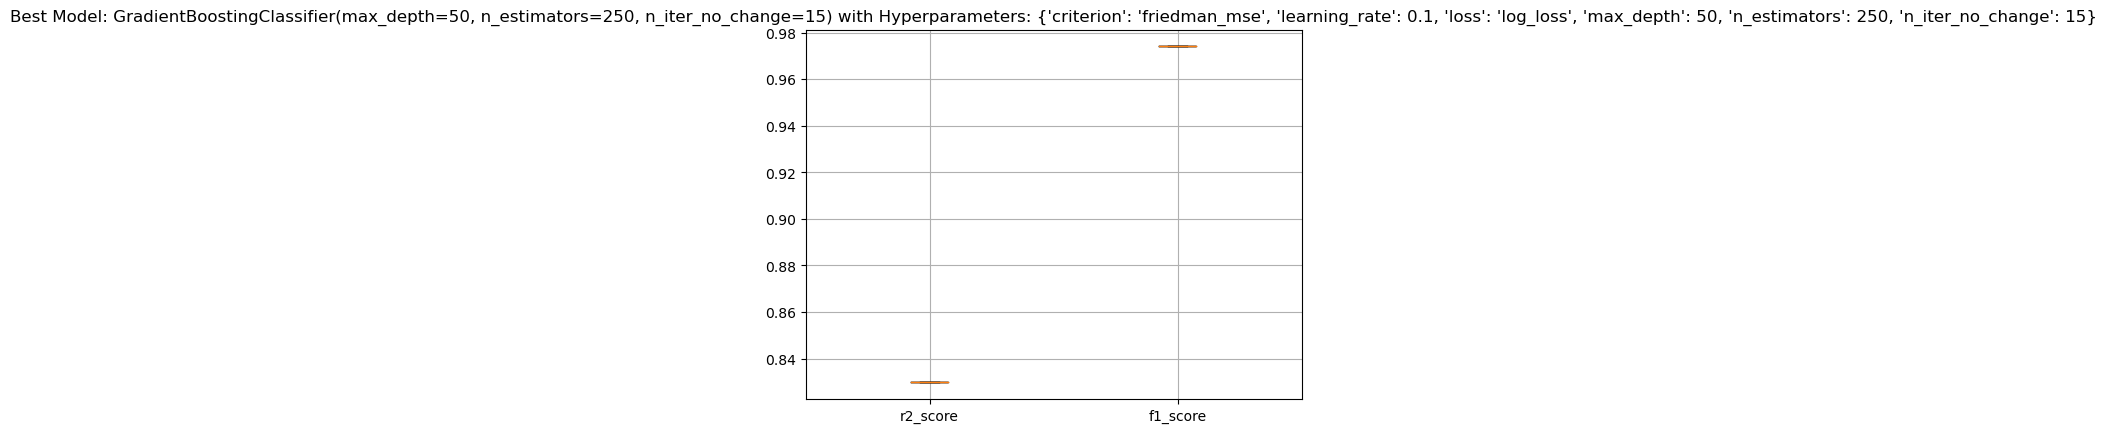

Best hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 50, 'n_estimators': 250, 'n_iter_no_change': 15}
Best score (f1_score): 0.9741025556454883


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

hyperparameters = {
    "loss": [ 'log_loss',"deviance"],
    'learning_rate': [0.1],
    'n_estimators': [100,250,500],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    "n_iter_no_change" : [15],
    "random_state": [random_seed], #control the randomness for each boosting
}

boosting_model = GradientBoostingClassifier()

best_model_boosting, best_params_boosting, best_score_boosting, all_results_boosting = grid_search(
    boosting_model, X, Y, hyperparameters, n=5, random_start= 42,
    saving_path="Archives_Model/Boosting_Classification/grid_best_model.joblib" ,display_boxplot=True)

In [ ]:
submit_best_boosting = submission(best_model_boosting,name_file="Submissions/best_boosting_submission.csv")